In [1]:
#https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW170814/v3/L-L1_GWOSC_4KHZ_R1-1186741846-32.gwf
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, matched_filter
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from urllib import urlretrieve
import numpy as np

# Read data and remove low frequency content
fname = 'L-L1_GWOSC_4KHZ_R1-1186741846-32.gwf'
url = 'https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW170814/v3/' + fname
urlretrieve(url, filename=fname) #Down load GW data file
h1 = read_frame('L-L1_GWOSC_4KHZ_R1-1186741846-32.gwf','L1:GWOSC-4KHZ_R1_STRAIN') #Read the file
h1 = highpass_fir(h1, 15, 8) #High pass filter. 15 = cutoff frequency, 8 = order

psd = interpolate(welch(h1), 1.0 / h1.duration) # Calculate the noise spectrum
snr_list = [] # Make a empty list to collect SNRs
x=[]
y=[]
z=[]

#----------------------------------Generate templates-------------------------------------#
mass1_list = np.arange(5, 50, 1)
mass2_list = np.arange(5, 50, 1)

#Two-layer circulation, to calculate max SNRs when masses vary.
for i in range(len(mass1_list)):
    for j in range(len(mass2_list)):
      if mass1_list[i]<= mass2_list[j]:
        # Generate a template to filter with
        hp, hc = get_fd_waveform(approximant="IMRPhenomD", 
                                 mass1=mass1_list[i], mass2=mass2_list[j],
                                 f_lower=20, 
                                 delta_f=1.0/h1.duration,
                                 distance = 450)
#----------------------------------Generation over---------------------------------------#

#-------------------------Matched filtering----------------------------------------------#
        hp.resize(len(h1) // 2 + 1) # Adjust data length

        snr = matched_filter(hp, h1, psd=psd, low_frequency_cutoff=20.0) # Calculate the SNR
        snr = snr[len(snr) // 4: len(snr) * 3 // 4] # Remove regions corrupted by filter wraparound
        snr = abs(snr)
        snr_array = np.array(snr)
        snr_array.tolist()
        
        max_snr = max(snr_array) # Extract the maximum SNR
        max_snr = round(max_snr, 3)
        snr_list.append(abs(max_snr)) # Collect the maximum SNRs.

        x.append(mass1_list[i])
        y.append(mass2_list[j])
        z.append(max_snr)
        
#-------------------------Matched filtering over-----------------------------------------#
        print('When Mass1= '
              + str(mass1_list[i])
              + ', Mass2=' 
              + str(mass2_list[j]) 
              + ', SNR=' 
              + str(abs(max_snr)))

When Mass1= 5, Mass2=5, SNR=5.688
When Mass1= 5, Mass2=6, SNR=5.834
When Mass1= 5, Mass2=7, SNR=5.822
When Mass1= 5, Mass2=8, SNR=6.823
When Mass1= 5, Mass2=9, SNR=5.946
When Mass1= 5, Mass2=10, SNR=6.693
When Mass1= 5, Mass2=11, SNR=6.788
When Mass1= 5, Mass2=12, SNR=5.945
When Mass1= 5, Mass2=13, SNR=5.499
When Mass1= 5, Mass2=14, SNR=6.243
When Mass1= 5, Mass2=15, SNR=5.877
When Mass1= 5, Mass2=16, SNR=7.996
When Mass1= 5, Mass2=17, SNR=6.604
When Mass1= 5, Mass2=18, SNR=6.132
When Mass1= 5, Mass2=19, SNR=6.481
When Mass1= 5, Mass2=20, SNR=6.522
When Mass1= 5, Mass2=21, SNR=6.837
When Mass1= 5, Mass2=22, SNR=6.668
When Mass1= 5, Mass2=23, SNR=6.528
When Mass1= 5, Mass2=24, SNR=6.533
When Mass1= 5, Mass2=25, SNR=6.882
When Mass1= 5, Mass2=26, SNR=6.281
When Mass1= 5, Mass2=27, SNR=6.559
When Mass1= 5, Mass2=28, SNR=6.685
When Mass1= 5, Mass2=29, SNR=6.728
When Mass1= 5, Mass2=30, SNR=6.979
When Mass1= 5, Mass2=31, SNR=6.812
When Mass1= 5, Mass2=32, SNR=6.816
When Mass1= 5, Mass2=33, 

When Mass1= 10, Mass2=30, SNR=8.678
When Mass1= 10, Mass2=31, SNR=9.562
When Mass1= 10, Mass2=32, SNR=9.521
When Mass1= 10, Mass2=33, SNR=9.817
When Mass1= 10, Mass2=34, SNR=9.469
When Mass1= 10, Mass2=35, SNR=9.243
When Mass1= 10, Mass2=36, SNR=9.742
When Mass1= 10, Mass2=37, SNR=10.037
When Mass1= 10, Mass2=38, SNR=10.375
When Mass1= 10, Mass2=39, SNR=9.957
When Mass1= 10, Mass2=40, SNR=8.75
When Mass1= 10, Mass2=41, SNR=9.026
When Mass1= 10, Mass2=42, SNR=9.292
When Mass1= 10, Mass2=43, SNR=9.821
When Mass1= 10, Mass2=44, SNR=9.804
When Mass1= 10, Mass2=45, SNR=9.334
When Mass1= 10, Mass2=46, SNR=9.522
When Mass1= 10, Mass2=47, SNR=9.881
When Mass1= 10, Mass2=48, SNR=9.935
When Mass1= 10, Mass2=49, SNR=10.269
When Mass1= 11, Mass2=11, SNR=6.932
When Mass1= 11, Mass2=12, SNR=7.385
When Mass1= 11, Mass2=13, SNR=6.867
When Mass1= 11, Mass2=14, SNR=6.856
When Mass1= 11, Mass2=15, SNR=6.91
When Mass1= 11, Mass2=16, SNR=7.021
When Mass1= 11, Mass2=17, SNR=7.546
When Mass1= 11, Mass2=18, S

When Mass1= 16, Mass2=38, SNR=10.908
When Mass1= 16, Mass2=39, SNR=11.048
When Mass1= 16, Mass2=40, SNR=11.328
When Mass1= 16, Mass2=41, SNR=11.727
When Mass1= 16, Mass2=42, SNR=12.064
When Mass1= 16, Mass2=43, SNR=12.277
When Mass1= 16, Mass2=44, SNR=12.398
When Mass1= 16, Mass2=45, SNR=12.421
When Mass1= 16, Mass2=46, SNR=12.309
When Mass1= 16, Mass2=47, SNR=12.075
When Mass1= 16, Mass2=48, SNR=12.224
When Mass1= 16, Mass2=49, SNR=12.517
When Mass1= 17, Mass2=17, SNR=8.374
When Mass1= 17, Mass2=18, SNR=7.959
When Mass1= 17, Mass2=19, SNR=8.494
When Mass1= 17, Mass2=20, SNR=9.336
When Mass1= 17, Mass2=21, SNR=9.333
When Mass1= 17, Mass2=22, SNR=9.355
When Mass1= 17, Mass2=23, SNR=9.698
When Mass1= 17, Mass2=24, SNR=10.149
When Mass1= 17, Mass2=25, SNR=10.314
When Mass1= 17, Mass2=26, SNR=9.886
When Mass1= 17, Mass2=27, SNR=8.791
When Mass1= 17, Mass2=28, SNR=9.326
When Mass1= 17, Mass2=29, SNR=9.485
When Mass1= 17, Mass2=30, SNR=9.45
When Mass1= 17, Mass2=31, SNR=9.785
When Mass1= 17,

When Mass1= 24, Mass2=26, SNR=10.376
When Mass1= 24, Mass2=27, SNR=10.621
When Mass1= 24, Mass2=28, SNR=10.933
When Mass1= 24, Mass2=29, SNR=11.426
When Mass1= 24, Mass2=30, SNR=11.862
When Mass1= 24, Mass2=31, SNR=12.238
When Mass1= 24, Mass2=32, SNR=12.437
When Mass1= 24, Mass2=33, SNR=12.287
When Mass1= 24, Mass2=34, SNR=11.896
When Mass1= 24, Mass2=35, SNR=12.351
When Mass1= 24, Mass2=36, SNR=12.899
When Mass1= 24, Mass2=37, SNR=13.278
When Mass1= 24, Mass2=38, SNR=13.331
When Mass1= 24, Mass2=39, SNR=13.062
When Mass1= 24, Mass2=40, SNR=12.498
When Mass1= 24, Mass2=41, SNR=12.311
When Mass1= 24, Mass2=42, SNR=12.302
When Mass1= 24, Mass2=43, SNR=12.265
When Mass1= 24, Mass2=44, SNR=12.178
When Mass1= 24, Mass2=45, SNR=12.036
When Mass1= 24, Mass2=46, SNR=11.826
When Mass1= 24, Mass2=47, SNR=11.57
When Mass1= 24, Mass2=48, SNR=11.304
When Mass1= 24, Mass2=49, SNR=11.091
When Mass1= 25, Mass2=25, SNR=10.384
When Mass1= 25, Mass2=26, SNR=10.626
When Mass1= 25, Mass2=27, SNR=10.968
Wh

When Mass1= 34, Mass2=44, SNR=11.835
When Mass1= 34, Mass2=45, SNR=11.846
When Mass1= 34, Mass2=46, SNR=11.816
When Mass1= 34, Mass2=47, SNR=11.749
When Mass1= 34, Mass2=48, SNR=11.654
When Mass1= 34, Mass2=49, SNR=11.547
When Mass1= 35, Mass2=35, SNR=11.159
When Mass1= 35, Mass2=36, SNR=10.93
When Mass1= 35, Mass2=37, SNR=11.151
When Mass1= 35, Mass2=38, SNR=11.348
When Mass1= 35, Mass2=39, SNR=11.504
When Mass1= 35, Mass2=40, SNR=11.621
When Mass1= 35, Mass2=41, SNR=11.714
When Mass1= 35, Mass2=42, SNR=11.783
When Mass1= 35, Mass2=43, SNR=11.825
When Mass1= 35, Mass2=44, SNR=11.831
When Mass1= 35, Mass2=45, SNR=11.795
When Mass1= 35, Mass2=46, SNR=11.722
When Mass1= 35, Mass2=47, SNR=11.624
When Mass1= 35, Mass2=48, SNR=11.546
When Mass1= 35, Mass2=49, SNR=11.806
When Mass1= 36, Mass2=36, SNR=11.154
When Mass1= 36, Mass2=37, SNR=11.352
When Mass1= 36, Mass2=38, SNR=11.506
When Mass1= 36, Mass2=39, SNR=11.622
When Mass1= 36, Mass2=40, SNR=11.711
When Mass1= 36, Mass2=41, SNR=11.778
Wh

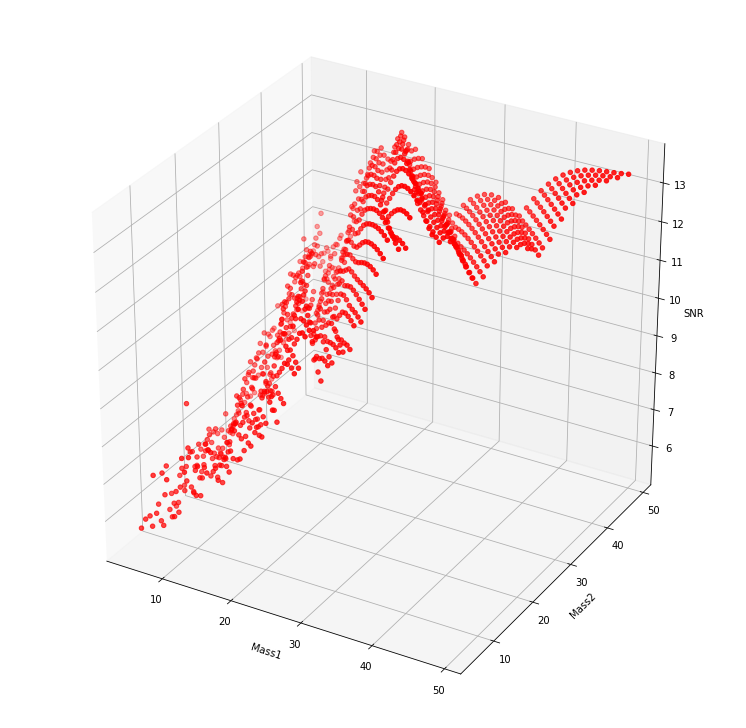

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Mass1')
ax.set_ylabel('Mass2')
ax.set_zlabel('SNR')
plt.show()

In [3]:
max(snr_list)

13.421

In [4]:
# Estimated mass:
# Mass1= 28 Mass2=33

In [5]:
# Compare our result with the LIGO's data
import pycbc.catalog
m = pycbc.catalog.Merger('GW170814')
m.data

{u'E_rad': {u'best': 2.7, u'err': [-0.3, 0.4]},
 u'L_peak': {u'best': 3.7, u'err': [-0.5, 0.4]},
 u'a_final': {u'best': 0.72, u'err': [-0.05, 0.07]},
 u'chi_eff': {u'best': 0.07, u'err': [-0.11, 0.12]},
 u'distance': {u'best': 580.0, u'err': [-210.0, 160.0]},
 u'far_cwb': {u'best': 0.00020800000000000001, u'err': u'upperbound'},
 u'far_gstlal': {u'best': 1e-07, u'err': u'upperbound'},
 u'far_pycbc': {u'best': 1.25e-05, u'err': u'upperbound'},
 u'files': {u'Catalog': u'Release1',
  u'DOI': u'https://doi.org/10.7935/82H3-HH23',
  u'DataRevisionNum': u'R1',
  u'FrameChannels': [u'H1:DCH-CLEAN_STRAIN_C02',
   u'L1:DCH-CLEAN_STRAIN_C02',
   u'V1:Hrec_hoft_V1O2Repro2A_16384Hz'],
  u'FrameTypes': [u'H1_CLEANED_HOFT_C02',
   u'L1_CLEANED_HOFT_C02',
   u'V1O2Repro2A'],
  u'GraceDB_ID': u'G297595',
  u'H1': {u'32sec': {u'16KHz': {u'GWF': u'https://www.gw-openscience.org/catalog/GWTC-1-confident/data/GW170814/H-H1_GWOSC_16KHZ_R1-1186741846-32.gwf',
     u'HDF': u'https://www.gw-openscience.org/ca